In [113]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Limpieza de datos
import re
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

import sklearn.preprocessing
import pyclustertend 
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from ast import literal_eval
from sklearn.decomposition import PCA

from scipy.spatial import distance
from scipy.spatial.distance import pdist, squareform

# np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

In [114]:
# Global Variables
seed = random.seed(123)

# Analisis Exploratorio

In [137]:
# Variable classification
data = pd.read_csv('./data.csv', encoding = "ISO-8859-1")
data = data.drop('index', axis=1)

In [138]:
print('Number of columns:', len(data))
data.head()

Number of columns: 40


,filename,sectionName,virtualAddress,virtualSize,rawDataSize,sectionNum,baseOfCode,imageBase,sectionAlignment,sizeOfInitializedData,sizeOfCode,dllCharacteristics,addressOfEntryPoint,date,dll,functions
0,RTC_7F85D7F628CE62D1D8F7B39D8940472,"['.text', '.rdata', '.data', '.rsrc']","['0x1000', '0x4000', '0x5000', '0x1f0000']","['0x288a', '0x990', '0x1ea098', '0x390']","[10752, 2560, 2048, 1024]",4,4096,4194304,4096,2011136,10752,0,3422617582,Mon May 30 08:29:29 2011 UTC,"['KERNEL32.DLL', 'MSVCRT.dll', 'SHELL32.dll', ...","['TerminateProcess', 'AllocConsole', 'MultiByt..."
1,FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2,"['.text', '.rdata', '.data', '.rsrc']","['0x1000', '0x2000', '0x3000', '0x4000']","['0xea6', '0x67e', '0x628', '0x7c']","[4096, 2048, 512, 512]",4,4096,4194304,4096,3072,4096,0,3422617582,Thu May 14 17:12:40 2009 UTC,"['KERNEL32.DLL', 'MSVCRT.dll', 'SHELL32.dll', ...","['CloseHandle', 'WaitForSingleObject', 'Create..."
2,1F2EB7B090018D975E6D9B40868C94CA,"['.text', '.rdata', '.data', '.rsrc']","['0x1000', '0x2000', '0x3000', '0x4000']","['0xd36', '0x51c', '0x608', '0x7c']","[3584, 1536, 512, 512]",4,4096,4194304,4096,2560,3584,0,3422617582,Fri Jan 15 17:20:56 2010 UTC,"['KERNEL32.DLL', 'MSVCRT.dll', 'USER32.dll', '...","['CloseHandle', 'WaitForSingleObject', 'Create..."
3,65018CD542145A3792BA09985734C12A,"['.text', '.rdata', '.data', '.rsrc']","['0x1000', '0x2000', '0x3000', '0x4000']","['0xe76', '0x67e', '0x628', '0x80']","[4096, 2048, 512, 512]",4,4096,4194304,4096,3072,4096,0,3422617582,Sun Nov 18 23:50:13 2007 UTC,"['KERNEL32.DLL', 'MSVCRT.dll', 'SHELL32.dll', ...","['CloseHandle', 'WaitForSingleObject', 'Create..."
4,FHHH6576C196385407B0F7F4B1B537D88983,"['.text', '.rdata', '.data', '.rsrc']","['0x1000', '0x2000', '0x3000', '0x4000']","['0xea6', '0x67e', '0x628', '0x84']","[4096, 2048, 512, 512]",4,4096,4194304,4096,3072,4096,0,3422617582,Thu May 14 17:12:40 2009 UTC,"['KERNEL32.DLL', 'MSVCRT.dll', 'SHELL32.dll', ...","['CloseHandle', 'WaitForSingleObject', 'Create..."


In [139]:
def removeSpecialChars(value):
  ayuda = re.sub(r"[^a-zA-Z ]",' ', value.lower())
  return ayuda

data["dll"] = data["dll"].apply(removeSpecialChars)
data["functions"] = data["functions"].apply(removeSpecialChars)

In [140]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.head()

,sectionNum,baseOfCode,imageBase,sectionAlignment,sizeOfInitializedData,sizeOfCode,dllCharacteristics,addressOfEntryPoint
0,4,4096,4194304,4096,2011136,10752,0,3422617582
1,4,4096,4194304,4096,3072,4096,0,3422617582
2,4,4096,4194304,4096,2560,3584,0,3422617582
3,4,4096,4194304,4096,3072,4096,0,3422617582
4,4,4096,4194304,4096,3072,4096,0,3422617582


In [141]:
def getBagOfWords(row_name):
  dataBodyList = data[row_name].to_list()
  bv = TfidfVectorizer(min_df=0.2, max_df=0.8, use_idf=True, ngram_range=(2,10))
  bv_matrix = bv.fit_transform(dataBodyList)
  vocabulario = bv.get_feature_names()
  bv_matrix = bv_matrix.toarray()
  return pd.DataFrame(bv_matrix, columns=vocabulario)
df_bvf = getBagOfWords('functions')
df_bvdll = getBagOfWords('dll')

In [143]:
final_data = pd.concat([numeric_data, df_bvf, df_bvdll], axis=1)
final_data.head()

,sectionNum,baseOfCode,imageBase,sectionAlignment,sizeOfInitializedData,sizeOfCode,dllCharacteristics,addressOfEntryPoint,acmdln getmainargs,acmdln getmainargs initterm,...,shell dll user dll,shell dll user dll ws,shell dll user dll ws dll,user dll advapi,user dll advapi dll,user dll ws,user dll ws dll,wininet dll,wininet dll ws,wininet dll ws dll
0,4,4096,4194304,4096,2011136,10752,0,3422617582,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.277779,0.277779,0.277779
1,4,4096,4194304,4096,3072,4096,0,3422617582,0.031499,0.031499,...,0.183537,0.183537,0.183537,0.0,0.0,0.124096,0.124096,0.000000,0.000000,0.000000
2,4,4096,4194304,4096,2560,3584,0,3422617582,0.048961,0.048961,...,0.000000,0.000000,0.000000,0.0,0.0,0.389418,0.389418,0.000000,0.000000,0.000000
3,4,4096,4194304,4096,3072,4096,0,3422617582,0.031499,0.031499,...,0.183537,0.183537,0.183537,0.0,0.0,0.124096,0.124096,0.000000,0.000000,0.000000
4,4,4096,4194304,4096,3072,4096,0,3422617582,0.031499,0.031499,...,0.183537,0.183537,0.183537,0.0,0.0,0.124096,0.124096,0.000000,0.000000,0.000000


# Quantitative data

In [144]:
X_scale = sklearn.preprocessing.scale(final_data)
pyclustertend.hopkins(X_scale, len(X_scale))

0.014690484811030184

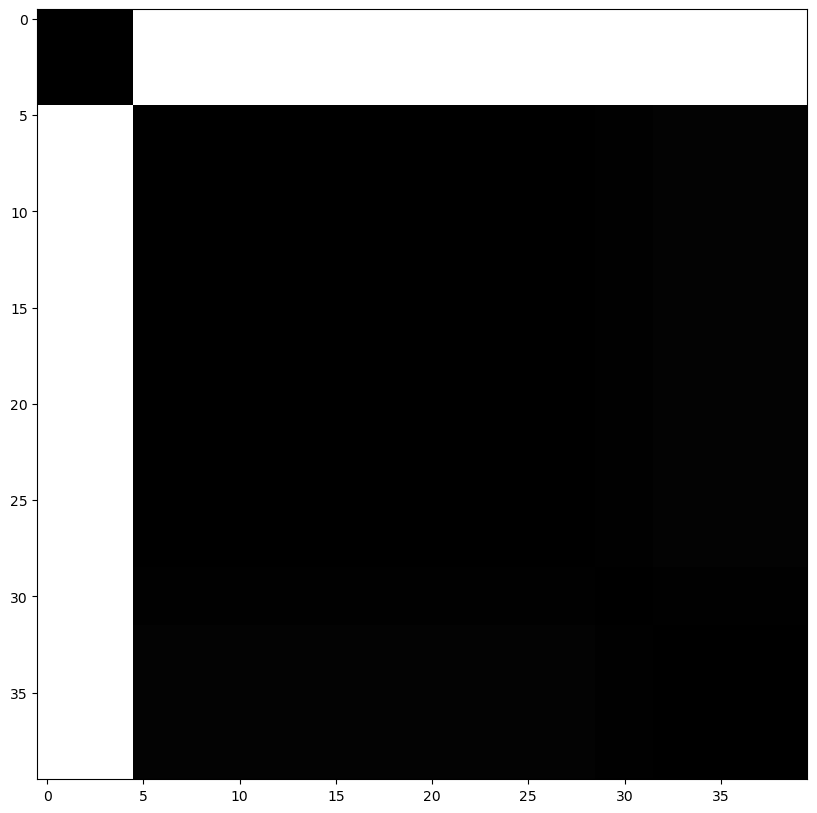

In [145]:
pyclustertend.vat(final_data)

# Grafica codo

Inertia con i  1    valor  45440.00000000004
Inertia con i  2    valor  23909.820395882405
Inertia con i  3    valor  9848.089951418297
Inertia con i  4    valor  3511.9401963914192
Inertia con i  5    valor  358.18228963418346


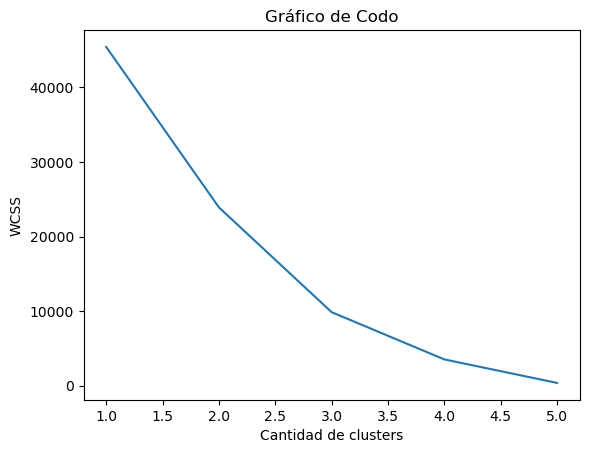

In [146]:
numeroClusters = range(1,6)

wcss = []
# Obtenemos 10 posibles clusters
for i in numeroClusters:
    # Se calcula la kmean con esa cantidad de clusters
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X_scale)
    # Obtenemos la inercia
    wcss.append(kmeans.inertia_)
    print("Inertia con i ", i, "   valor ", kmeans.inertia_)

# Graficando
plt.plot(numeroClusters, wcss)
plt.xlabel("Cantidad de clusters")
plt.ylabel("WCSS")
plt.title("Gráfico de Codo")
plt.show()

# Construyendo modelo

In [147]:
number_clusters = 4

In [148]:
kmeans_cluster = KMeans(n_clusters=number_clusters, max_iter=5)
kmeans_cluster.fit(X_scale)
kmeans_result = kmeans_cluster.predict(X_scale)

pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X_scale)

In [149]:
data['x'] = pca_vecs[:, 0]
data['y'] = pca_vecs[:, 1]
data['cluster'] = kmeans_result

In [150]:
data.head()

,filename,sectionName,virtualAddress,virtualSize,rawDataSize,sectionNum,baseOfCode,imageBase,sectionAlignment,sizeOfInitializedData,sizeOfCode,dllCharacteristics,addressOfEntryPoint,date,dll,functions,x,y,cluster
0,RTC_7F85D7F628CE62D1D8F7B39D8940472,"['.text', '.rdata', '.data', '.rsrc']","['0x1000', '0x4000', '0x5000', '0x1f0000']","['0x288a', '0x990', '0x1ea098', '0x390']","[10752, 2560, 2048, 1024]",4,4096,4194304,4096,2011136,10752,0,3422617582,Mon May 30 08:29:29 2011 UTC,kernel dll msvcrt dll shell dll ...,terminateprocess allocconsole multibyt...,9.588978,12.132135,2
1,FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2,"['.text', '.rdata', '.data', '.rsrc']","['0x1000', '0x2000', '0x3000', '0x4000']","['0xea6', '0x67e', '0x628', '0x7c']","[4096, 2048, 512, 512]",4,4096,4194304,4096,3072,4096,0,3422617582,Thu May 14 17:12:40 2009 UTC,kernel dll msvcrt dll shell dll ...,closehandle waitforsingleobject create...,-23.819504,-8.700201,0
2,1F2EB7B090018D975E6D9B40868C94CA,"['.text', '.rdata', '.data', '.rsrc']","['0x1000', '0x2000', '0x3000', '0x4000']","['0xd36', '0x51c', '0x608', '0x7c']","[3584, 1536, 512, 512]",4,4096,4194304,4096,2560,3584,0,3422617582,Fri Jan 15 17:20:56 2010 UTC,kernel dll msvcrt dll user dll ...,closehandle waitforsingleobject create...,-14.271651,0.414438,3
3,65018CD542145A3792BA09985734C12A,"['.text', '.rdata', '.data', '.rsrc']","['0x1000', '0x2000', '0x3000', '0x4000']","['0xe76', '0x67e', '0x628', '0x80']","[4096, 2048, 512, 512]",4,4096,4194304,4096,3072,4096,0,3422617582,Sun Nov 18 23:50:13 2007 UTC,kernel dll msvcrt dll shell dll ...,closehandle waitforsingleobject create...,-23.819504,-8.700201,0
4,FHHH6576C196385407B0F7F4B1B537D88983,"['.text', '.rdata', '.data', '.rsrc']","['0x1000', '0x2000', '0x3000', '0x4000']","['0xea6', '0x67e', '0x628', '0x84']","[4096, 2048, 512, 512]",4,4096,4194304,4096,3072,4096,0,3422617582,Thu May 14 17:12:40 2009 UTC,kernel dll msvcrt dll shell dll ...,closehandle waitforsingleobject create...,-23.819504,-8.700201,0


<AxesSubplot:xlabel='x', ylabel='y'>

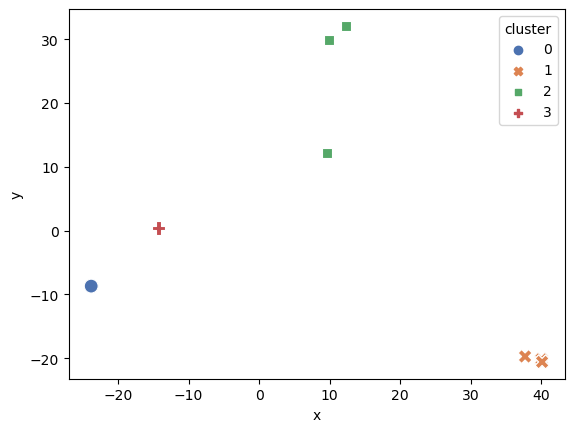

In [151]:
sns.scatterplot(data=data, x='x', y='y', hue='cluster', style='cluster', palette='deep', s=100)

# Silhouette

For n_clusters = 4 The average silhouette_score of K-Means is: 0.8795005803603244


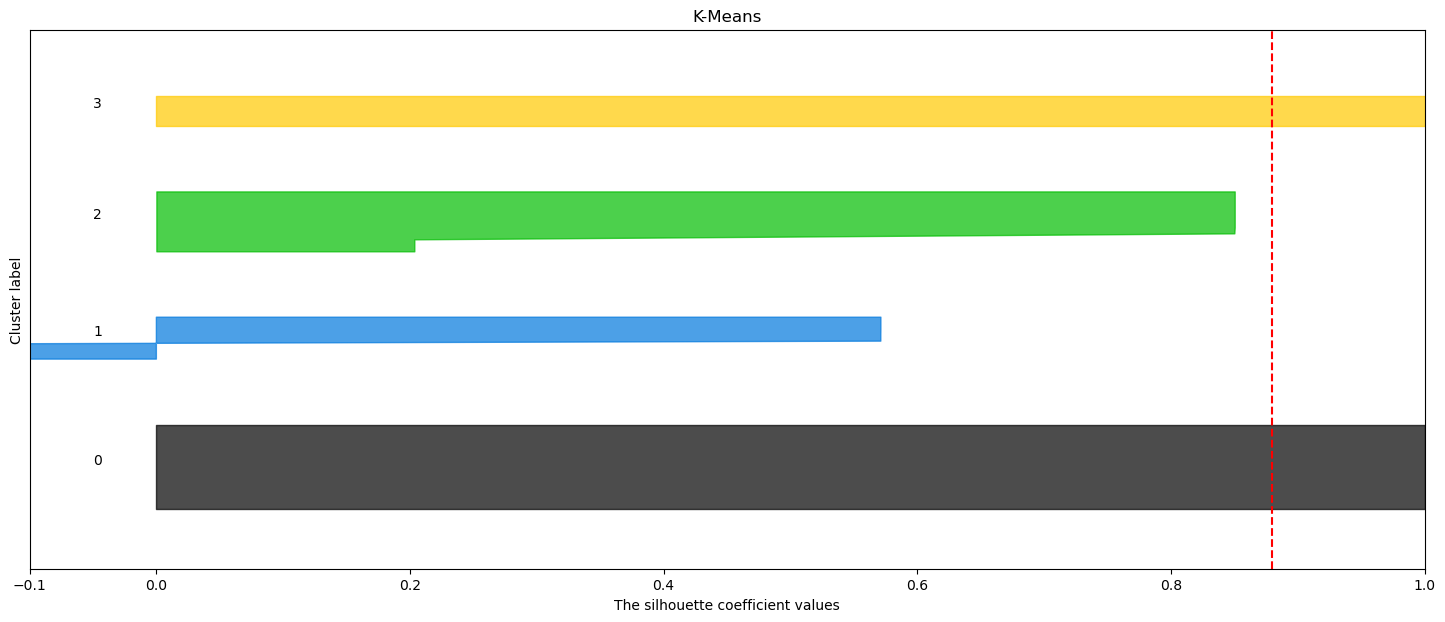

In [152]:
def make_silhouette(clusterer, n_clusters, label):
    fig, ax = plt.subplots(figsize=(1,1))
    fig.set_size_inches(18, 7)

    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X_scale) + (n_clusters + 1) * 10])

    cluster_labels = clusterer.fit_predict(X_scale)

    silhouette_avg = silhouette_score(X_scale, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score of",
        label,
        'is:',
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(final_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title(label)
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([]) 
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

make_silhouette(kmeans_cluster, number_clusters, 'K-Means')
plt.show()

# Jaccard

In [153]:
# quantitative_variables = ["dll encoded", "functions encoded"]

# for i in range(number_clusters):
#     print("Cluster num: ", i)
#     cluster = data[data["Cluster"] == i]

#     res = distance.jaccard(cluster[quantitative_variables[0]], cluster[quantitative_variables[1]])
#     print("Jaccard distance: ", res)

#     res = 1 - pdist(cluster[[quantitative_variables[0], quantitative_variables[1]]], 'jaccard')
#     dist = squareform(res)
#     print("Matrix 2D: ")
#     print(dist)
#     print("\n\n")